In [28]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
data = mnist.load_data()

height = 28
length = 28

data_train_image = data[0][0].reshape(data[0][0].shape[0], height*length) # en ligne
data_train_label = data[0][1]
data_train_label_1h = np.zeros((data_train_label.size, data_train_label.max()+1))
data_train_label_1h[np.arange(data_train_label.size),data_train_label] = 1


data_test_image = data[1][0].reshape(data[1][0].shape[0], height*length) # en ligne
data_test_label = data[1][1]
data_test_label_1h = np.zeros((data_test_label.size, data_test_label.max()+1))
data_test_label_1h[np.arange(data_test_label.size),data_test_label] = 1

In [2]:
input_size = length*height
label_size = 10
lr = 0.5

tf_features = tf.placeholder(tf.float32, shape=[None,input_size])
tf_targets = tf.placeholder(tf.float32, shape=[None,label_size])

# input layer
w1 = tf.Variable(tf.random.normal([input_size, label_size]))
b1 = tf.Variable(tf.zeros([label_size]))
# operations
z1 = tf.matmul(tf_features, w1) + b1
# a1 = tf.nn.sigmoid(z1)

# # out layer
# w2 = tf.Variable(tf.random.normal([3,1]))
# b2 = tf.Variable(tf.zeros([1]))
# # operations
# z2 = tf.matmul(a1, w2) + b2
p = tf.nn.softmax(z1)

cost = tf.nn.softmax_cross_entropy_with_logits(labels = tf_targets, logits = z1)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = lr)
train = optimizer.minimize(cost)

# metrics
pred_is_correct = tf.equal(tf.round(p), tf_targets)
accuracy = tf.reduce_mean(tf.cast(pred_is_correct, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [29]:
epochs = 1000
batch = 100
show_every = 100
for e in range(epochs):
    rand_indexes = np.random.randint(data_train_label_1h.shape[0], size = batch)
    label_batchs = data_train_label_1h[rand_indexes,:]
    image_batch = data_train_image[rand_indexes,:]

    sess.run(train, feed_dict={
        tf_features: image_batch,
        tf_targets: label_batchs
    })

    if e % show_every == 0:
        print("accuracy:", sess.run(accuracy, feed_dict={
            tf_features: data_train_image,
            tf_targets: data_train_label_1h
        }))

accuracy: 0.8375367
accuracy: 0.97237664
accuracy: 0.96365
accuracy: 0.96316665
accuracy: 0.9745733
accuracy: 0.9781233
accuracy: 0.97475666
accuracy: 0.9721633
accuracy: 0.97959334
accuracy: 0.9776367


p: 8


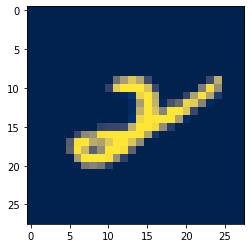

In [66]:
# test_w = data_train_image
test_w = data_test_image

rand_index = np.random.randint(test_w.shape[0])
test_img = data_train_image[rand_index]

print("p:", 
    np.argmax(
        sess.run(
            p,
            feed_dict={
                tf_features: [test_img]
            }
        )
    )
)

lh = int(np.sqrt(test_img.shape))
img = test_img.reshape(lh,lh)
plt.imshow(img, cmap="cividis")

In [125]:
test_w, labels = data_train_image, data_train_label
# test_w = data_test_image, data_test_labels

test_n = 20
rand_indexes = np.random.randint(test_w.shape[0], size = test_n)
test_imgs = test_w[rand_indexes]
test_labels = labels[rand_indexes]
preds = []

pred_1h = sess.run(p, feed_dict={tf_features: test_imgs})
preds = np.argmax(pred_1h, 1)

j = 0
for i in range(test_n):
    if preds[i] != test_labels[i]:
        preds[j], test_labels[j] = preds[i], test_labels[i]
        j+=1
        


print(f" preds: {preds}")
print(f"labels: {test_labels}")

 preds: [5 0 5 7 1 9 8 7 4 8 4 7 8 9 1 5 2 4 5 5]
labels: [8 0 5 7 1 9 8 7 4 8 4 7 8 9 1 5 2 4 5 8]
